### Various Imports

In [31]:
#1
import numpy as np
%pylab 
#style.use('ggplot')
rcParams['figure.figsize'] = 12,8
from numba import jit

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
import copy
import networkx as nx

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Matrix Connectivity Functions

In [2]:
def getRandomConnectivity(N, pct_connected):
    #Directed mapping
    M = np.random.rand(N**2).reshape(N,N)
    for i in range(N):
        for j in range(N):
            if (i == j):
                M[i,j] = 0
            else:
                if (M[i,j] < pct_connected):
                    M[i,j] = 1 #i connects to j
                else:
                    M[i,j] = 0
    return M

# alternate version
def getRandomConnectivity2(N, pct_connected):
    # There are N*(N-1)/2 upper diagonal elements
    rand_elems = np.where(np.random.rand(N*(N-1)/2) < pct_connected, 1, 0)
    M = np.zeros((N,N))
    M[np.triu_indices(N,1)] = rand_elems
    return M + M.T

# Original version with bidirectional mapping 
def getRandomConnectivity3(N, pct_connected):
    # There is no self coupling so the diagonal must be zero. 
    # The graph is non directed so M must be symmetric
    M = np.random.rand(N**2).reshape(N,N)
    for i in range(N):
        for j in range(i, N):
            if (i == j):
                M[i,j] = 0
            else:
                if (M[i,j] < pct_connected):
                    M[i,j] = 1
                else:
                    M[i,j] = 0
                M[j,i] = M[i,j]
    return M

### K-core Functions

In [3]:
def hasKcore(M, k):
    # we'll be destroying the array so make a copy to work with
    X = M.copy()
    while(True):
        cur_num_nodes = X.shape[0]
        s = np.sum(X, 0)
        nodes_to_delete = np.where(s < k)[0]
        if (len(nodes_to_delete) == cur_num_nodes):
            # nothing has at least k connections
            
            X = np.delete(X, nodes_to_delete, axis=0)
            X = np.delete(X, nodes_to_delete, axis=1)
            
            return False
            break
        elif (len(nodes_to_delete) == 0):
            # They all have at least k connections, we've found a kcore
            return True
            break
        else:
            X = np.delete(X, nodes_to_delete, axis=0)
            X = np.delete(X, nodes_to_delete, axis=1)

            
# TODO get Kcore indices 

def largestKcore(M):
    # we can begin the search at the least connected node
    connectivity = np.sum(M,0)
    min_kcore = np.min(connectivity)
    max_kcore = np.max(connectivity)
    if max_kcore == 0:
        return 0
    k = min_kcore
    while (hasKcore(M,k)):
        k = k+1
        
    return k - 1
        
    
    
def largestkcore(M):
    # we can begin the search at the least connected node
    connectivity = np.sum(M,0)
    min_kcore = np.min(connectivity)
    max_kcore = np.max(connectivity)
    if max_kcore == 0:
        return 0
    k = min_kcore
    s=1
    while (s==1):
        
        X = M.copy()
        while(True):
            cur_num_nodes = X.shape[0]
            s = np.sum(X, 0)
            nodes_to_delete = np.where(s < k)[0]
            if (len(nodes_to_delete) == cur_num_nodes):
            # nothing has at least k connections
            
                X = np.delete(X, nodes_to_delete, axis=0)
                X = np.delete(X, nodes_to_delete, axis=1)
            
                s=0
                break
            elif (len(nodes_to_delete) == 0):
            # They all have at least k connections, we've found a kcore
                s=1
                break
            else:
                X = np.delete(X, nodes_to_delete, axis=0)
                X = np.delete(X, nodes_to_delete, axis=1)
        k = k+1
        
    return k - 1

#TODO: Instead of deleting nodes, put 0's on all the connections for the rows and columns that are disconnected
    #Keeps number of all neurons the same so that neuron 3 doesnt become neuron 2 etc. 
    #Look for neurons not in Kcore which are firing and neurons that are in kcore and not firing. 
def kcoreitself(M, k):
    # we'll be destroying the array so make a copy to work with
    X = M.copy()
    
    while(True):
        cur_num_nodes = X.shape[0]
        s = np.sum(X, 0)
        nodes_to_delete = np.where(s < k)[0]
        if (len(nodes_to_delete) == cur_num_nodes):
            
            X = np.delete(X, nodes_to_delete, axis=0)
            X = np.delete(X, nodes_to_delete, axis=1)
            # nothing has at least k connections
            return X
            break
        elif (len(nodes_to_delete) == 0):
            # They all have at least k connections, we've found a kcore
            return X
            break
        else:
            X = np.delete(X, nodes_to_delete, axis=0)
            X = np.delete(X, nodes_to_delete, axis=1)



#here we get the largest connected component of  the graph

def largestcomponent(l,N):
    n=np.random.randint(0,N)
    
    boundary=[n]
    b=1
    comp=[n]
    c=1
   
    while(b>0):
        a=boundary.pop()
        
        oldvertex=int(a)
        
        deg=l[oldvertex,0]
        degree=int(deg)
        #print(degree)
        for j in range(degree):
            newvertex=l[oldvertex,j+1]
            q=comp.count(newvertex)
            #print(newvertex)
            q=int(q)
            #print(q)
            if (q==0):
                comp.append(newvertex)
                boundary.append(newvertex)
                #print(newvertex)
                #print(boundary)
            
        b=len(boundary)
            
    #sizeofcomp=len(comp)
    return(comp)

def matrixOfEdges(M,N):
    N = int(N)
    E=np.zeros(N**2).reshape(N,N)  #prepare array with zeros
    k=np.sum(M,0) #array with degree of each vertex
    for i in range(N):
        a=int(k[i]) #degree of the current vertex
        E[i,0]=a  #we put it to the zero row of matrix of edges
    for i in range(N):
        a=int(k[i])
        q=1
        for j in range(N):
            if (M[j,i]==1):
                E[i,q]=j #all the next elements in current column are number of vertices current vertex is connected to
                q=q+1
    return(E)

### Functions simulating Network Dynamics

In [4]:
def simdyn(M,l,params):
    return simDynamics(M,l,params)

@jit(nopython=True)
def simDynamics(M,l,params):
    N=int(params[0])
    n=int(params[1])
    dt=params[2]
    tauv=params[3]
    tauc=params[4]
    Vstar=params[5]
    Cstar=params[6]
    delV=params[7]
    delC=params[8]
    r=params[9]
    V0=params[10]
    C0=params[11]
    V=zeros(N*n).reshape(N,n)  #now we have potencial and calcium concentration for each neuron
    C=zeros(N*n).reshape(N,n)
    P=zeros(n)  # function P(V), sigmoid
    sump=zeros(n)  #sum of P over the vertices
    avV=zeros(N) #average potencial
    avC=zeros(N)  #average calcium
    #res = int(params[12]) #resulting classification 
    firing_neurons_count = zeros(N*n).reshape(N,n) #Individually count how may neurons are actually firing in this model at a given step N.
    
    for i in range(n):
        V[0,i]=V0 #initial conditions
        C[0,i]=C0 
        if V[0,i] > Vstar:
            firing_neurons_count[0,i] = 1
        avV[0]=n*V0  #we will divide to n later
        avC[0]=n*C0
    for i in range (N-1):
        for j in range(n):
            P[j] = 1/(1+exp((Vstar-V[i,j])*0.2))
        for j in range(n):
            a=int(l[j,0])
            for k in range(a):
                b=int(l[j,k])
                sump[j]=sump[j]+P[b]  #if neuron connected to j-th neuron it participates in sum
        for j in range(n):
            V[i+1,j]=(-V[i,j]/tauv + delV*r*sump[j]*(1/(1+exp(C[i,j]-Cstar))) )*dt + V[i,j]
            if V[i+1,j] > Vstar: 
                firing_neurons_count[i+1,j] = 1 #used to return count of firing neurons later
            C[i+1,j]=(-C[i,j]/tauc + delC*r*sump[j])*dt + C[i,j]
            avC[i+1]=avC[i+1]+C[i+1,j]
            avV[i+1]=avV[i+1]+V[i+1,j]
        for j in range(n):
            sump[j]=0
    for i in range (N):
        avC[i]=avC[i]/n
        avV[i]=avV[i]/n
        
   
    return(avC,avV,firing_neurons_count)

In [5]:
import pdb
#for some reason we need this funky embedding
def simdyn3(M, l, params):
    return simDynamics3(M, l, params)



@jit(nopython=True)
def simDynamics3(M, l, params):  #params is a vector of parameters
    N=int(params[0])
    n=int(params[1])
    dt=params[2]
    tauv=params[3]
    tauc=params[4]
    Vstar=params[5]
    Cstar=params[6]
    delV=params[7]
    delC=params[8]
    r=params[9]
    V0=params[10]
    C0=params[11]
    delVmin = params[12]
    V=zeros(N*n).reshape(N,n)  #now we have potencial and calcium concentration for each neuron
    C=zeros(N*n).reshape(N,n)
    #P=zeros(n)  # function P(V), sigmoid
    P = zeros(N*n).reshape(N,n)
    deltaV=zeros(n)
    sump=zeros(n)  #sum of P over the vertices
    avV=zeros(N) #average potencial
    avC=zeros(N)  #average calcium
    firing_neurons_count = zeros(N*n).reshape(N,n) #Individually count how may neurons are actually firing in this model at a given step N.
    
    for i in range(n):
        V[0,i]=V0 #initial conditions
        C[0,i]=C0 
        if V[0,i] > Vstar: #keep track of and return how many neurons in the network are actually firing  
            firing_neurons_count[0,i] = 1
        avV[0]=n*V0  #we will divide to n later
        avC[0]=n*C0
    for i in range (N-1):
        for j in range(n):
            if (V[i,j]>Vstar): #V[i,j] stores voltage of each neuron instead of returning the average voltage 
                P[i,j]=70
            else:
                P[i,j]=0 #5
            if (C[i,j]<Cstar):
                deltaV[j]=delV #change from 1.2 
            else:
                deltaV[j]=delVmin #changed from .4
        for j in range(n):
            a=int(l[j,0]) #a should give number of firing neighbors 
            for k in range(a):
                #b=int(l[j,k])
                b = int(l[j,k+1])
                sump[j]=sump[j]+P[i,b]  #if neuron connected to j-th neuron it participates in sum
        for j in range(n):
            V[i+1,j]=(-V[i,j]/tauv + deltaV[j]*sump[j])*dt + V[i,j]
            if V[i+1,j] > Vstar: 
                firing_neurons_count[i+1,j] = 1 #used to return count of firing neurons later
            #if ((firing_neurons_count[i,j] == 1) and (firing_neurons_count[i+1,j] == 0)):
            #    print(sump[j])
            C[i+1,j]=(-C[i,j]/tauc + delC*r*sump[j])*dt + C[i,j]
            avC[i+1]=avC[i+1]+C[i+1,j]
            avV[i+1]=avV[i+1]+V[i+1,j]
        for j in range(n):
            sump[j]=0
    for i in range (N):
        avC[i]=avC[i]/n
        avV[i]=avV[i]/n
        
        #plot([avC[i],avC[i+1]],[avV[i],avV[i+1]])    
    return(avC,avV, firing_neurons_count, P, V)

### Classification Function

In [6]:
def classify(V, params):
    #Set up some globals 
    
    N = int(params[0])
    n = int(params[1])
    
    #Network uniformly connected but vectorized lets us scale later 
    #for i in range (N/2, N):
    #max_V = max(V[int(N/2):N])
    #min_V = min(V[int(N/2):N])
    max_V = max(V[int(.9*N):N])
    min_V = min(V[int(.9*N):N])
   
            
    V_delta = max_V - min_V
    #print(V_delta)
    
    if V_delta < 0.001: #changed from 1
        if V[N-1] < 15:
            #params[12] = 2
            return 2
        else:
            #params[12] = 3
            return 3
    else:
        #params[12] = 1
        return 1

### Neuron Removal Function

In [7]:
def killNeuron(N,M_prime):
    M = copy.deepcopy(M_prime)
    #Randomly pick a neuron to remove
    #x = np.random.randint(N)
    x = 1
    M = np.delete(M,x,axis=0)
    M = np.delete(M,x,axis=1)
    return M

#TODO: Kill N neurons from the network systematically instead of one at a time. 
def killNeuron2(to_cull, M_prime):
    M = copy.deepcopy(M_prime) 
    #Systemically cull certain neuron from the matrix
    x = 0    
    for i in range (int(to_cull)):
        M = np.delete(M,x,axis=0)
        M = np.delete(M,x,axis=1)
    return M

### Phase Diagrams for step function without offset

In [8]:
#Phase Diagrams 

n=150 #100

p = .5 #Connectivity rate High connectivity is just mean field so it looks a lot smoother... want to maybe not make it so high 1/6

M=getRandomConnectivity(n,p) #args(n,p)
l=matrixOfEdges(M,n)
M_prime = copy.deepcopy(M)
l_prime = copy.deepcopy(l)
#curr_n = n #Current number of neurons in network 
to_cull = 0

In [9]:
N=10000
dt=0.001
T=zeros(N)
for i in range(N):
    T[i]=i*dt

tauv=0.01 #0.01
tauc=0.5 #0.5
Vstar=15 #Constant (according to experiments) 15
Cstar=5 #20
V0=18 #18
C0=18 #18

delV= 2. #1.2
delVmin = 0#delV/3#delV/3
delC= 0.015 #0.015
r= 70 #70

params=zeros(13)
params[0]=N
params[1]=n
params[2]=dt
params[3]=tauv
params[4]=tauc
params[5]=Vstar
params[6]=Cstar
params[7]=delV
params[8]=delC
params[9]=r
params[10]=V0
params[11]=C0
params[12]=delVmin #connenctivity rate from above.


phasen = []
phaseV = []
kCore = []
kCore_predict = []

dV = 0.1 #.25
delVmax = 20.

while True:
    C,V,f,P,Voltages = simdyn3(M_prime,l_prime,params)
    check = classify(V,params)
    while True:
        #import pdb; pdb.set_trace()
        params[1] -= 1
        #curr_n = curr_n-1
        to_cull += 1
        M_prime = killNeuron2(to_cull, M)
        l_prime = matrixOfEdges(M_prime, params[1])
        if params[1] <= 1:
            params[7] += dV
            params[12] = params[7]/3
            params[1] = n
            to_cull = 0
            M_prime = copy.deepcopy(M)
            l_prime = copy.deepcopy(l)
            #curr_n = n
            break
        C,V,f,P,Voltages = simdyn3(M_prime,l_prime,params)
        check2 = classify(V,params)
        if check2 != check:
            print("delV: ", params[7])
            print("transition from", check, "to", check2)
            #print("Kcore: ", largestKcore(M_prime), "Predicted:",floor(Vstar/(tauv*70*params[12])))
            print("Kcore: ", largestKcore(M_prime), "Predicted:",Vstar/(tauv*70*params[12]))
            phasen.append(params[1])
            phaseV.append(params[7])
            kCore.append(largestKcore(M_prime))
            kCore_predict.append(floor(Vstar/(tauv * 70 * params[12])))
            params[7] += dV
            params[12] = params[7]/3
            if params[1] < n-3:
                to_cull -= 3
                params[1] += 3 #Changed from params[1] = n to track boundary 
                M_prime = killNeuron2(to_cull, M)
                l_prime = matrixOfEdges(M_prime, params[1])
            else:
                to_cull = 0
                params[1] = n 
                M_prime = copy.deepcopy(M)
                l_prime = copy.deepcopy(l)
                
            break

    if params[7] > delVmax:
        break
print('loop complete')


delV:  2.1
transition from 3 to 2
Kcore:  30.0 Predicted: 30.612244897959176
delV:  2.2
transition from 3 to 2
Kcore:  29.0 Predicted: 29.220779220779217
delV:  2.3000000000000003
transition from 3 to 2
Kcore:  27.0 Predicted: 27.95031055900621
delV:  2.4000000000000004
transition from 3 to 2
Kcore:  26.0 Predicted: 26.785714285714278
delV:  2.5000000000000004
transition from 3 to 2
Kcore:  25.0 Predicted: 25.714285714285708
delV:  2.6000000000000005
transition from 3 to 2
Kcore:  24.0 Predicted: 24.72527472527472
delV:  2.7000000000000006
transition from 3 to 2
Kcore:  23.0 Predicted: 23.8095238095238
delV:  2.8000000000000007
transition from 3 to 2
Kcore:  22.0 Predicted: 22.95918367346938
delV:  2.900000000000001
transition from 3 to 2
Kcore:  22.0 Predicted: 22.167487684729057
delV:  3.000000000000001
transition from 3 to 2
Kcore:  21.0 Predicted: 21.428571428571423
delV:  3.100000000000001
transition from 3 to 2
Kcore:  20.0 Predicted: 20.737327188940085
delV:  3.200000000000001
t

delV:  11.299999999999976
transition from 3 to 2
Kcore:  5.0 Predicted: 5.689001264222514
delV:  11.399999999999975
transition from 3 to 2
Kcore:  5.0 Predicted: 5.639097744360914
delV:  11.499999999999975
transition from 3 to 2
Kcore:  5.0 Predicted: 5.590062111801254
delV:  11.599999999999975
transition from 3 to 2
Kcore:  5.0 Predicted: 5.541871921182278
delV:  11.699999999999974
transition from 3 to 2
Kcore:  5.0 Predicted: 5.494505494505506
delV:  11.799999999999974
transition from 3 to 2
Kcore:  5.0 Predicted: 5.447941888619866
delV:  11.899999999999974
transition from 3 to 2
Kcore:  5.0 Predicted: 5.40216086434575
delV:  11.999999999999973
transition from 3 to 2
Kcore:  5.0 Predicted: 5.357142857142868
delV:  12.099999999999973
transition from 3 to 2
Kcore:  5.0 Predicted: 5.3128689492325964
delV:  12.199999999999973
transition from 3 to 2
Kcore:  5.0 Predicted: 5.2693208430913465
delV:  12.299999999999972
transition from 3 to 2
Kcore:  5.0 Predicted: 5.226480836236945
delV:  12

### Plot Exact Vs Predicted kcore size

In [60]:
plot(phaseV, kCore, label="Observed $k$ value", color="red", lw=4)
plot(phaseV, kCore_predict, ls='dotted', label="Theoretical $k$ Value",color="blue", lw=4) 
legend(prop={'size': 30})
#title("k-core vs. $\Delta V$")
xlabel("$\Delta V$", fontsize=30)
ylabel("$k$ value", fontsize=30)
plt.tick_params(axis='both', labelsize=30)
#savefig("figures/kcore_exact_vs_predict2.png")
savefig("paper_figures/kcore_exact_vs_predict.png")

In [32]:
ax = plt.subplot(111)
plt.plot(phaseV, kCore)
plt.plot(phaseV, kCore_predict, ls='dotted')
ax.grid(False)
xlabel("$\Delta V$")
ylabel("k-core size")
ax.xaxis
plt.show()

In [64]:
plt.plot(phaseV, phasen, lw = 4)
xlabel("$\Delta V$", fontsize=30)
ylabel("Neurons in Network", fontsize=30)
plt.tick_params(axis='both', labelsize=30)
plt.text(10, 40, "HA", fontsize=50)
plt.text(5, 20, "Q", fontsize=50)
#savefig("figures/kcore_exact_vs_predict2_phase.png")
savefig("paper_figures/kcore_exact_vs_predict_phase.png")

In [61]:
plt.plot(C,V)

### For plotting a picture of the network connectivity 

In [95]:
#Looking at k-core size versus the actual number of firing neurons in the network 
N=10000
n=50 #150
dt=0.001
T=zeros(N)
for i in range(N):
    T[i]=i*dt
p = .4 #Connectivity rate High connectivity is just mean field so it looks a lot smoother... want to maybe not make it so high

M=getRandomConnectivity(n,p) #args(n,p)
M_T = transpose(M)
l1=matrixOfEdges(M,n)
l2=matrixOfEdges(M_T,n)
#M_prime = copy.deepcopy(M_T)
#l_prime = copy.deepcopy(l)

tauv=0.01 #0.01
tauc=0.5 #0.5
Vstar=15 #Constant (according to experiments) 15
Cstar=20 #15
V0=30 #18
C0=30 #18

delV= 10. #1.2
delVmin = delV/3
delC= 0.015 #0.015
r= 70 #70

#M_prime = killNeuron2(n-cull_to, M_T)
#l_prime = matrixOfEdges(M_prime, cull_to)

params=zeros(13)
params[0]=N
params[1]=n #instead of actual n, cull neurons til desired value
params[2]=dt
params[3]=tauv
params[4]=tauc
params[5]=Vstar
params[6]=Cstar
params[7]=delV
params[8]=delC
params[9]=r
params[10]=V0
params[11]=C0
params[12]=delVmin #connenctivity rate from above.


#C,V,neuron_counts = simdyn3(M_prime,l_prime,params)
C,V,neuron_counts, P, Voltages = simdyn3(M,l1,params)


#C,V,neuron_counts = simdyn(M, l1, params)
itself = kcoreitself(M,ceil(Vstar/(tauv*delVmin*r)))
#plt.plot(C,V)

#plt.plot(C,V)

In [96]:
out = Vstar/(tauv*delVmin*r)

print("Classification:",classify(V,params))
print("Largest kcore:", largestKcore(M))
print("Predicted k: ",out)
print("Shape of kcore (gives kcore size):",itself.shape)
print("Number of neurons total in network:",params[1])
print("Number of firing neurons:",sum(neuron_counts[N-1]))

Classification: 3
Largest kcore: 14.0
Predicted k:  6.428571428571428
Shape of kcore (gives kcore size): (50, 50)
Number of neurons total in network: 50.0
Number of firing neurons: 50.0


In [38]:
C,V,firing_neurons = simdyn(M, l1, params)
plt.plot(C,V)

In [39]:
G = nx.DiGraph()
H = nx.DiGraph()
G.add_nodes_from(range(0,n))
H.add_nodes_from(range(0,n))
for i in range(n):
    for j in range(n):
        if M[i,j] == 1: #and neuron_counts[N-1,j] == 1:
            #if neuron_counts[N-1,j] == 1:
            if neuron_counts[N-1,i] == 1:
                H.add_edge(i,j,firing=True)
            else:
                G.add_edge(i,j,firing=False)

### The actual cell producing neuron network plot 

In [40]:
plt.title("%d Neurons in network"%G.order())
nx.draw_circular(H,node_size=20,width=0.3,node_color='black', edge_color='red',with_labels=True)
nx.draw_circular(G,node_size=20,width=0.3,edge_color='black',node_color='black')
#plt.savefig('neuron_connectivity.png')

### Mean Field Analysis with Step Function 

In [165]:
#Step Function Toy Model 

#similar to simdyn from before but for mean field case 
@jit(nopython=True)
def mean_field_dynamics(params):
    N = int(params[0])
    n = int(params[1]) 
    dt = params[2]
    tauv = params[3]
    tauc = params[4] 
    Vstar = params[5] 
    Cstar = params[6]
    delV = params[7]
    delC = params[8]
    r_1 = params[9]
    r_0 = params[10]
    V_0 = params[11]
    C_0 = params[12]
    
    V=zeros(N*n).reshape(N,n)  #now we have potencial and calcium concentration for each neuron
    C=zeros(N*n).reshape(N,n)
    
    firing_neurons_count = zeros(N*n).reshape(N,n) #Individually count how may neurons are actually firing in this model at a given step N.
    
    avV=zeros(N) #average potencial
    avC=zeros(N)  #average calcium
    
    for i in range(n):
        V[0,i]=V_0 #initial conditions
        C[0,i]=C_0
        if V[0,i] > Vstar: #keep track of and return how many neurons in the network are actually firing  
            firing_neurons_count[0,i] = 1
        avV[0]=n*V_0  #we will divide to n later
        avC[0]=n*C_0
    
    for i in range(N - 1): 
        for j in range(n):
            if V[i,j] > Vstar: 
                r = r_1
            else:
                r = 0

            if C[i,j] < Cstar: 
                dV = delV 
            else: 
                dV = 0

            V[i+1,j] = (-V[i,j]/tauv + n*dV*(r + r_0)) * dt + V[i,j]
            if V[i+1,j] > Vstar: 
                firing_neurons_count[i+1,j] = 1
            C[i+1,j] = (-C[i,j]/tauc + n*delC*(r + r_0)) * dt + C[i,j]
            avC[i+1]=avC[i+1]+C[i+1,j]
            avV[i+1]=avV[i+1]+V[i+1,j]
            
    for i in range (N):
        avC[i]=avC[i]/n
        avV[i]=avV[i]/n    
    
    return avC, avV, firing_neurons_count 
    
    

N = 10000 #Number of Steps 
dt = 0.001

T = zeros(N)
#V = zeros(N) 
#C = zeros(N)

#V[0] = 18
#C[0] = 18

V_0, C_0 = 18, 18

tauv = 0.01 #0.01
tauc = 0.5 #0.5

Vstar = 15#15
Cstar = 20#20

n = 100 #100

delV = 5. #1.
delC = 0.01#0.015, 0.01
r_1 = 70 #3000
r_0 = 5 #5

conditions = tauc*delC*r_1 > Cstar and tauc*delC*r_0 < Cstar and delV*tauv*r_0 > Vstar

params = zeros(13)
params[0] = N
params[1] = n
params[2] = dt 
params[3] = tauv 
params[4] = tauc 
params[5] = Vstar
params[6] = Cstar 
params[7] = delV 
params[8] = delC 
params[9] = r_1 
params[10] = r_0 
params[11] = V_0
params[12] = C_0

C,V,f = mean_field_dynamics(params)

plt.plot(C,V,lw=4)
print("Classification:", classify(V,params))
print("Conditions for SO phase met:", conditions)

#plt.title("High Voltage Fixed Point")
plt.xlabel("C",fontsize=30)
plt.ylabel("V",fontsize=30)
plt.tick_params(axis='both', labelsize=25)
plt.text(19.25, 200, "SO", fontsize=65)
plt.savefig("paper_figures/step_SO.png")

        

Classification: 1
Conditions for SO phase met: False


In [125]:
#Phase diagram in delV 
#phasen, phaseV, phasen_SO, phasen_Q, phase_SO, phase_Q = [],[],[],[],[],[]
phasen, phaseV = [],[] #for plotting general, uninformative phase diagram
phasen_SO_Q, phasen_Q_HA, phasen_SO_HA, phase_SO_Q, phase_Q_HA, phase_SO_HA, phasen_HA_Q, phase_HA_Q = [],[],[],[],[],[],[],[]
dV = 0.1
delVmax = 10.

#For Q phase 
while True:
    C,V,f = mean_field_dynamics(params)
    check = classify(V,params)
    while True:
        params[1] -= 1
        if params[1] <= 1:
            params[7] += dV
            params[1] = n
            break
        C,V,f = mean_field_dynamics(params)
        check2 = classify(V,params)
        if check2 != check:
            print("delV: ", params[7])
            print("transition from", check, "to", check2)
            phasen.append(params[1])
            phaseV.append(params[7])
            #Added to plot the two different phase boundaries 
            '''
            if check == 2: 
                phase_Q.append(params[7])
                phasen_Q.append(params[1])
            elif check == 1: 
                phase_SO.append(params[7])
                phasen_SO.append(params[1])
            '''
            if check == 1 and check2 == 2: 
                phasen_SO_Q.append(params[1])
                phase_SO_Q.append(params[7])
            elif check == 1 and check2 == 3:
                phasen_SO_HA.append(params[1])
                phase_SO_HA.append(params[7])
            elif check == 2 and check2 == 3: 
                phasen_Q_HA.append(params[1])
                phase_Q_HA.append(params[7])
            elif check == 3 and check2 == 2: 
                phasen_HA_Q.append(params[1])
                phase_HA_Q.append(params[7])
            #End Inserted Code
            #params[7] += dV
            #params[1] = n
            break
    if params[7] > delVmax:
        break
        
print('loop complete') 

delV:  0.4
transition from 2 to 3
delV:  0.4
transition from 3 to 2
delV:  0.5
transition from 2 to 3
delV:  0.5
transition from 3 to 2
delV:  0.6
transition from 2 to 3
delV:  0.6
transition from 3 to 2
delV:  0.7
transition from 2 to 3
delV:  0.7
transition from 3 to 2
delV:  0.7999999999999999
transition from 2 to 3
delV:  0.7999999999999999
transition from 3 to 2
delV:  0.8999999999999999
transition from 2 to 3
delV:  0.8999999999999999
transition from 3 to 2
delV:  0.9999999999999999
transition from 2 to 3
delV:  0.9999999999999999
transition from 3 to 2
delV:  1.0999999999999999
transition from 2 to 3
delV:  1.0999999999999999
transition from 3 to 2
delV:  1.2
transition from 2 to 3
delV:  1.2
transition from 3 to 2
delV:  1.3
transition from 2 to 3
delV:  1.3
transition from 3 to 2
delV:  1.4000000000000001
transition from 2 to 3
delV:  1.4000000000000001
transition from 3 to 2
delV:  1.5000000000000002
transition from 2 to 3
delV:  1.5000000000000002
transition from 3 to 2
delV

delV:  7.999999999999988
transition from 1 to 3
delV:  7.999999999999988
transition from 3 to 2
delV:  8.099999999999987
transition from 1 to 3
delV:  8.099999999999987
transition from 3 to 2
delV:  8.199999999999987
transition from 1 to 3
delV:  8.199999999999987
transition from 3 to 2
delV:  8.299999999999986
transition from 1 to 3
delV:  8.299999999999986
transition from 3 to 2
delV:  8.399999999999986
transition from 1 to 3
delV:  8.399999999999986
transition from 3 to 2
delV:  8.499999999999986
transition from 1 to 3
delV:  8.499999999999986
transition from 3 to 2
delV:  8.599999999999985
transition from 1 to 3
delV:  8.599999999999985
transition from 3 to 2
delV:  8.699999999999985
transition from 1 to 3
delV:  8.699999999999985
transition from 3 to 2
delV:  8.799999999999985
transition from 1 to 3
delV:  8.799999999999985
transition from 3 to 2
delV:  8.899999999999984
transition from 1 to 3
delV:  8.899999999999984
transition from 3 to 2
delV:  8.999999999999984
transition from

In [141]:
#Plotting
plot(phase_SO_Q, phasen_SO_Q, label="SO-Q boundary", color="red", lw=4)
plot(phase_SO_HA, phasen_SO_HA, label="SO-HA boundary", color="blue", lw=4)
plot(phase_Q_HA, phasen_Q_HA, label="Q-HA boundary", color="green", lw=4)
plot(phase_HA_Q, phasen_HA_Q, label="HA-Q boundary", color="purple", lw=4)
plt.legend(prop={'size': 20})
plt.xlabel("Voltage ($\Delta$V)", fontsize=30)
plt.ylabel("Neuron Count (n)", fontsize=30)
#plt.title("Neuron Count vs. Voltage Phase Diagram. $\Delta$C = %f"%delC)
plt.text(6,60,"SO",fontsize=35)
plt.text(3,60,"Q",fontsize=35)
plt.text(5,40,"HA", fontsize=35)
plt.text(0.75,10,"Q",fontsize=35)
#plt.text(6, 37.2, "Q")
#plt.text(9., 37.2, "SO")
#plt.text(8,32, "HA")
plt.tick_params(axis='both', labelsize=25)
plt.savefig("paper_figures/step_nV_phase.png", bbox_inches="tight")

In [111]:
plot(phaseV,phasen)

In [143]:
#Phase diagram in delC 

delC = 0.
delV = 5.
#phasen, phaseC, phasen_SO, phasen_Q, phasen_HA, phase_SO, phase_Q, phase_HA = [],[],[],[],[],[],[],[]
phasen, phaseC = [],[] #for plotting general, uninformative phase diagram
phasen_SO_Q, phasen_Q_HA, phasen_SO_HA, phase_SO_Q, phase_Q_HA, phase_SO_HA = [],[],[],[],[],[]

#Just to reset all parameters 
params = zeros(13)
params[0] = N
params[1] = n
params[2] = dt 
params[3] = tauv 
params[4] = tauc 
params[5] = Vstar
params[6] = Cstar 
params[7] = delV 
params[8] = delC 
params[9] = r_1 
params[10] = r_0 
params[11] = V_0
params[12] = C_0

#phasen, phaseC = [],[]
dC = 0.0002 #0.001
delCmax = .04

while True:
    C,V,f = mean_field_dynamics(params)
    check = classify(V,params)
    while True:
        params[1] -= 1
        if params[1] <= 1:
            params[8] += dC
            params[1] = n
            break
        C,V,f = mean_field_dynamics(params)
        check2 = classify(V,params)
        if check2 != check:
            print("delC: ", params[8])
            print("transition from", check, "to", check2)
            phasen.append(params[1])
            phaseC.append(params[8])
            '''
            if check == 2: 
                phase_Q.append(params[8])
                phasen_Q.append(params[1])
            elif check == 1: 
                phase_SO.append(params[8])
                phasen_SO.append(params[1])
            else:
                phase_HA.append(params[8])
                phasen_HA.append(params[1])
            '''
            if check == 1 and check2 == 2: 
                phasen_SO_Q.append(params[1])
                phase_SO_Q.append(params[8])
            elif check == 1 and check2 == 3:
                phasen_SO_HA.append(params[1])
                phase_SO_HA.append(params[8])
            elif check == 2 and check2 == 3: 
                phasen_Q_HA.append(params[1])
                phase_Q_HA.append(params[8])
            #params[8] += dC
            #if params[1] < n-3:
            #    params[1] += 3 #Changed from params[1] = n to track boundary 
            #else:
            #    params[1] = n 
            #params[1] = n
            break
    if params[8] > delCmax:
        break
print("loop complete")

delC:  0.0
transition from 3 to 2
delC:  0.0002
transition from 3 to 2
delC:  0.0004
transition from 3 to 2
delC:  0.0006000000000000001
transition from 3 to 2
delC:  0.0008
transition from 3 to 2
delC:  0.001
transition from 3 to 2
delC:  0.0012000000000000001
transition from 3 to 2
delC:  0.0014000000000000002
transition from 3 to 2
delC:  0.0016000000000000003
transition from 3 to 2
delC:  0.0018000000000000004
transition from 3 to 2
delC:  0.0020000000000000005
transition from 3 to 2
delC:  0.0022000000000000006
transition from 3 to 2
delC:  0.0024000000000000007
transition from 3 to 2
delC:  0.0026000000000000007
transition from 3 to 2
delC:  0.002800000000000001
transition from 3 to 2
delC:  0.003000000000000001
transition from 3 to 2
delC:  0.003200000000000001
transition from 3 to 2
delC:  0.003400000000000001
transition from 3 to 2
delC:  0.003600000000000001
transition from 3 to 2
delC:  0.0038000000000000013
transition from 3 to 2
delC:  0.004000000000000001
transition from 

delC:  0.015800000000000015
transition from 3 to 2
delC:  0.016000000000000014
transition from 1 to 2
delC:  0.016000000000000014
transition from 2 to 3
delC:  0.016000000000000014
transition from 3 to 2
delC:  0.016200000000000013
transition from 1 to 2
delC:  0.016200000000000013
transition from 2 to 3
delC:  0.016200000000000013
transition from 3 to 2
delC:  0.016400000000000012
transition from 1 to 2
delC:  0.016400000000000012
transition from 2 to 3
delC:  0.016400000000000012
transition from 3 to 2
delC:  0.01660000000000001
transition from 1 to 2
delC:  0.01660000000000001
transition from 2 to 3
delC:  0.01660000000000001
transition from 3 to 2
delC:  0.01680000000000001
transition from 1 to 2
delC:  0.01680000000000001
transition from 2 to 3
delC:  0.01680000000000001
transition from 3 to 2
delC:  0.017000000000000008
transition from 1 to 2
delC:  0.017000000000000008
transition from 2 to 3
delC:  0.017000000000000008
transition from 3 to 2
delC:  0.017200000000000007
transitio

delC:  0.02679999999999995
transition from 3 to 2
delC:  0.026999999999999948
transition from 1 to 2
delC:  0.026999999999999948
transition from 2 to 3
delC:  0.026999999999999948
transition from 3 to 2
delC:  0.027199999999999946
transition from 1 to 2
delC:  0.027199999999999946
transition from 2 to 3
delC:  0.027199999999999946
transition from 3 to 2
delC:  0.027399999999999945
transition from 1 to 2
delC:  0.027399999999999945
transition from 2 to 3
delC:  0.027399999999999945
transition from 3 to 2
delC:  0.027599999999999944
transition from 1 to 2
delC:  0.027599999999999944
transition from 2 to 3
delC:  0.027599999999999944
transition from 3 to 2
delC:  0.027799999999999943
transition from 1 to 2
delC:  0.027799999999999943
transition from 2 to 3
delC:  0.027799999999999943
transition from 3 to 2
delC:  0.02799999999999994
transition from 1 to 2
delC:  0.02799999999999994
transition from 2 to 3
delC:  0.02799999999999994
transition from 3 to 2
delC:  0.02819999999999994
transiti

delC:  0.03779999999999988
transition from 1 to 2
delC:  0.03779999999999988
transition from 2 to 3
delC:  0.03779999999999988
transition from 3 to 2
delC:  0.03799999999999988
transition from 1 to 2
delC:  0.03799999999999988
transition from 2 to 3
delC:  0.03799999999999988
transition from 3 to 2
delC:  0.03819999999999988
transition from 1 to 2
delC:  0.03819999999999988
transition from 2 to 3
delC:  0.03819999999999988
transition from 3 to 2
delC:  0.03839999999999988
transition from 1 to 2
delC:  0.03839999999999988
transition from 2 to 3
delC:  0.03839999999999988
transition from 3 to 2
delC:  0.03859999999999988
transition from 1 to 2
delC:  0.03859999999999988
transition from 2 to 3
delC:  0.03859999999999988
transition from 3 to 2
delC:  0.038799999999999876
transition from 1 to 2
delC:  0.038799999999999876
transition from 2 to 3
delC:  0.038799999999999876
transition from 3 to 2
delC:  0.038999999999999875
transition from 1 to 2
delC:  0.038999999999999875
transition from 2 

In [145]:
plot(phase_SO_Q, phasen_SO_Q, label="SO-Q boundary", color="red", lw=4)
plot(phase_SO_HA, phasen_SO_HA, label="SO-HA boundary", color="blue", lw=4)
plot(phase_Q_HA, phasen_Q_HA, label="Q-HA boundary", color="green", lw=4)
legend(prop={'size': 30})
plt.xlabel("Calcium ($\Delta$C)", fontsize=30)
plt.ylabel("Neuron Count (n)", fontsize=30)
#plt.title("Neuron Count vs. Calcium Phase Diagram. $\Delta$V = %f"%(delV))
plt.text(.006, 45,"HA", fontsize=35)
plt.text(.015, 50, "Q", fontsize=35)
plt.text(.015, 65, "SO", fontsize=35)
plt.tick_params(axis='both', labelsize=25)
plt.savefig("paper_figures/step_nC_phase.png", bbox_inches="tight")

In [114]:
#Plotting 
plot(phase_Q, phasen_Q, label="Quiescent boundary", color="red")
plot(phase_SO, phasen_SO, label="SO boundary", color="blue")
plot(phase_HA, phasen_HA, label="HA boundary", color="green")
plt.legend()
plt.xlabel("Calcium ($\Delta$C)")
plt.ylabel("Neuron Count (n)")
plt.title("Neuron Count vs. Calcium Phase Diagram. $\Delta$V = %f"%(delV))
plt.text(.008, 45,"HA")
plt.text(.015, 50, "Q")
plt.text(.015, 65, "SO")
plt.text(.0125, 1, "Q")
#plt.savefig("figures/step_nC_phase.png")

NameError: name 'phase_Q' is not defined

### Here I plot phase diagrams for the Step Function using a randomly connected matrix 

In [8]:
def simdyn4(M, l, params):
    return simDynamics4(M, l, params)

@jit(nopython=True)
def simDynamics4(M, l, params):  #params is a vector of parameters
    N=int(params[0])
    n=int(params[1])
    dt=params[2]
    tauv=params[3]
    tauc=params[4]
    Vstar=params[5]
    Cstar=params[6]
    delV=params[7]
    delC=params[8]
    r_1=params[9]
    V0=params[10]
    C0=params[11]
    delVmin=params[12]
    r_0=params[13]
    V=zeros(N*n).reshape(N,n)  #now we have potencial and calcium concentration for each neuron
    C=zeros(N*n).reshape(N,n)
    #P=zeros(n)  # function P(V), sigmoid
    P = zeros(N*n).reshape(N,n)
    deltaV=zeros(n)
    sump=zeros(n)  #sum of P over the vertices
    avV=zeros(N) #average potencial
    avC=zeros(N)  #average calcium
    firing_neurons_count = zeros(N*n).reshape(N,n) #Individually count how may neurons are actually firing in this model at a given step N.
    
    for i in range(n):
        V[0,i]=V0 #initial conditions
        C[0,i]=C0 
        if V[0,i] > Vstar: #keep track of and return how many neurons in the network are actually firing  
            firing_neurons_count[0,i] = 1
        avV[0]=n*V0  #we will divide to n later
        avC[0]=n*C0
    for i in range (N-1):
        for j in range(n):
            if (V[i,j]>Vstar): #V[i,j] stores voltage of each neuron instead of returning the average voltage 
                P[i,j]=r_1+r_0
            else:
                P[i,j]=r_0
            if (C[i,j]<Cstar):
                deltaV[j]=delV #change from 1.2 
            else:
                deltaV[j]=delVmin #changed from .4
        for j in range(n):
            a=int(l[j,0]) #a should give number of firing neighbors 
            for k in range(a):
                #b=int(l[j,k])
                b = int(l[j,k+1])
                sump[j]=sump[j]+P[i,b]  #if neuron connected to j-th neuron it participates in sum
        for j in range(n):
            V[i+1,j]=(-V[i,j]/tauv + deltaV[j]*sump[j])*dt + V[i,j]
            if V[i+1,j] > Vstar: 
                firing_neurons_count[i+1,j] = 1 #used to return count of firing neurons later
            #if ((firing_neurons_count[i,j] == 1) and (firing_neurons_count[i+1,j] == 0)):
            #    print(sump[j])
            #C[i+1,j]=(-C[i,j]/tauc + delC*(r_1+r_0)*sump[j])*dt + C[i,j]
            C[i+1,j]=(-C[i,j]/tauc + delC*sump[j])*dt + C[i,j]
            avC[i+1]=avC[i+1]+C[i+1,j]
            avV[i+1]=avV[i+1]+V[i+1,j]
        for j in range(n):
            sump[j]=0
    for i in range (N):
        avC[i]=avC[i]/n
        avV[i]=avV[i]/n
        
        #plot([avC[i],avC[i+1]],[avV[i],avV[i+1]])    
    return(avC,avV, firing_neurons_count, P, V)

In [17]:
#Network behavior for one set of parameters 
N=100000
n=100 #150
dt=0.0001 #0.001
T=zeros(N)
for i in range(N):
    T[i]=i*dt
p = .9 #1/6 in real world 

M=getRandomConnectivity(n,p) #args(n,p)
l=matrixOfEdges(M,n)
M_prime = copy.deepcopy(M)
l_prime = copy.deepcopy(l)
to_cull = 0

tauv=0.01 #0.01
tauc=0.5 #0.5
Vstar=15 #Constant (according to experiments) 15
Cstar=20 #15
V0=18 #18
C0=19.4 #18

delV= 2. #1.2
delVmin = delV/3 #delV/3
delC= 0.015 #0.015
r_1= 70 #Max Firing rate is r_1 + r_0 70
r_0 = 0 #Min firing rate 5

#Instantiate array of parameters 
params=zeros(14)
params[0]=N
params[1]=n #instead of actual n, cull neurons til desired value
params[2]=dt
params[3]=tauv
params[4]=tauc
params[5]=Vstar
params[6]=Cstar
params[7]=delV
params[8]=delC
params[9]=r_1
params[10]=V0
params[11]=C0
params[12]=delVmin #connenctivity rate from above.
params[13]=r_0 

C,V,f,P,Voltages = simdyn4(M,l, params) 
figure(1)
plot(C,V)
ylabel("V")
xlabel("C")
title("Randomly Connected Network")
figure(2)
plot(T,V)
ylabel("V")
xlabel("T")

figure(3)
plot(T,C)
ylabel("C")
xlabel("T")

figure(4)
plot(T,f)
ylabel("r")
xlabel("T")
#savefig("step_rand.png") 
print(classify(V,params))
print(M)

3
[[0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [18]:
#Phase diagram in delV 
#phasen, phaseV, phasen_SO, phasen_Q, phase_SO, phase_Q = [],[],[],[],[],[]
phasen, phaseV, kCore = [],[],[] #for plotting general, uninformative phase diagram
phasen_SO_Q, phasen_Q_HA, phasen_SO_HA, phase_SO_Q, phase_Q_HA, phase_SO_HA = [],[],[],[],[],[]
#phasen_SO_Q, phasen_Q_HA, phasen_SO_HA, phase_SO_Q, phase_Q_HA, phase_SO_HA = [],[],[],[],[],[]
dV = .1
delVmax = 15.
to_cull = 0

while True:
    C,V,f,P,Voltages = simdyn4(M_prime,l_prime,params)
    check = classify(V,params)
    while True:
        params[1] -= 1
        to_cull += 1
        M_prime = killNeuron2(to_cull, M)
        l_prime = matrixOfEdges(M_prime, params[1])
        if params[1] <= 1:
            params[7] += dV
            params[12] = params[7]/3
            params[1] = n
            to_cull = 0
            M_prime = copy.deepcopy(M)
            l_prime = copy.deepcopy(l)
            break
        C,V,f,P,Voltages = simdyn4(M_prime,l_prime,params)
        check2 = classify(V,params)
        if check2 != check:
            print("delV: ", params[7])
            print("transition from", check, "to", check2)
            #print("Kcore: ", largestKcore(M_prime), "Predicted:",Vstar/(tauv*70*params[12]))
            phasen.append(params[1])
            phaseV.append(params[7])
            kCore.append(largestKcore(M_prime))
            if check == 1 and check2 == 2: 
                phasen_SO_Q.append(params[1])
                phase_SO_Q.append(params[7])
            elif check == 1 and check2 == 3:
                phasen_SO_HA.append(params[1])
                phase_SO_HA.append(params[7])
            elif check == 2 and check2 == 3: 
                phasen_Q_HA.append(params[1])
                phase_Q_HA.append(params[7])
            params[7] += dV
            params[12] = params[7]/3
            if params[1] < n-3:
                to_cull -= 3
                params[1] += 3 #Changed from params[1] = n to track boundary 
                M_prime = killNeuron2(to_cull, M)
                l_prime = matrixOfEdges(M_prime, params[1])
            else:
                to_cull = 0
                params[1] = n 
                M_prime = copy.deepcopy(M)
                l_prime = copy.deepcopy(l)
                
            break

    if params[7] > delVmax:
        break
print('loop complete')

delV:  2.0
transition from 3 to 2
delV:  2.1
transition from 3 to 2
delV:  2.2
transition from 3 to 2
delV:  2.3000000000000003
transition from 3 to 2
delV:  2.4000000000000004
transition from 3 to 2
delV:  2.5000000000000004
transition from 3 to 2
delV:  2.6000000000000005
transition from 3 to 2
delV:  2.7000000000000006
transition from 3 to 2
delV:  2.8000000000000007
transition from 3 to 2
delV:  2.900000000000001
transition from 3 to 2
delV:  3.000000000000001
transition from 3 to 2
delV:  3.100000000000001
transition from 3 to 2
delV:  3.200000000000001
transition from 3 to 2
delV:  3.300000000000001
transition from 3 to 2
delV:  3.4000000000000012
transition from 3 to 2
delV:  3.5000000000000013
transition from 3 to 2
delV:  3.6000000000000014
transition from 3 to 2
delV:  3.7000000000000015
transition from 3 to 2
delV:  3.8000000000000016
transition from 3 to 2
delV:  3.9000000000000017
transition from 3 to 2
delV:  4.000000000000002
transition from 3 to 2
delV:  4.1000000000000

In [25]:
plot(phaseV, phasen, label="High Activity - Quiescent fixed point transition")
legend()
#savefig("step_nooffset_phase.png")
#plot(phase_SO_Q, phasen_SO_Q,color="red")
#plot(phase_SO_HA, phasen_SO_HA,color="blue")
#plot(phase_Q_HA, phasen_Q_HA,color="green")

###  Looking at a highly squished sigmoid function to compare to step function 

In [54]:
#simulation of the situation when all neurons are connected

N=10000   #number of steps
dt=0.001 #time step in milliseconds
#prepare arrays. First we need to set an array of zeros with necessary size and then change its elements

T=zeros(N)  #array of times
V=zeros(N)  #array of potentials as function of time
C=zeros(N)  #array of calcium concentration

#initial potential and calcium concentration
V[0]=18
C[0]=18
#time constants in milliseconds
tauv=0.01
tauc=0.5

#threshold values for potential and calcium concentration
Vstar=15
Cstar=20

#number of neurons
n=100

g_v = 2
g_c = 2

off_set = 1

delV=10 #constant defining how strong neurons firing affect potential
delC=0.015 #constant defining how strong neurons firing affect calcium concentration
r=70  #rate of firing in Hz. Does not present in the equation in the paper because can be hidden in the redefinition of delV and delC

for i in range(N-1):  #numerical solution of the differential equation. This numerical method, called Newton's, is the most trivial and known for not working 
    #in some cases. We will start with it and later can compare with other, more sophisticated methods. You can google and try it yourself. 
    V[i+1]=(-V[i]/tauv + n*delV*r*(1/(1+exp((Vstar-V[i])/g_v)))*(1/(1+exp(C[i]-Cstar))) )*dt + V[i]  #step function is defined as sigmoid 1/(1+exp)
    C[i+1]=(-C[i]/tauc + delC*n*r*(1/(1+exp((Vstar-V[i])/g_c))))*dt + C[i]

plot(C,V) #we plot phase diagram concentration vs potential. 


Simple plot of sigmoid to play around with 

In [56]:
x = []
for i in linspace(-30,30,1000):
    x.append(1/(1+exp(-i/g_v)) + off_set) 

plot(x)

### Squished sigmoid And Randomly Connected Matrix 


In [19]:
def simdyn(M, l, params):
    return simDynamics(M, l, params)

@jit(nopython=True)
def simDynamics(M, l, params):  #params is a vector of parameters
    N=int(params[0])
    n=int(params[1])
    dt=params[2]
    tauv=params[3]
    tauc=params[4]
    Vstar=params[5]
    Cstar=params[6]
    delV=params[7]
    delC=params[8]
    r=params[9]
    V0=params[10]
    C0=params[11]
    V=zeros(N*n).reshape(N,n)  #now we have potencial and calcium concentration for each neuron
    C=zeros(N*n).reshape(N,n)
    P=zeros(n)  # function P(V), sigmoid
    sump=zeros(n)  #sum of P over the vertices
    avV=zeros(N) #average potencial
    avC=zeros(N)  #average calcium
    g_v=params[12]
    g_c=params[13]
    r_0=params[14]
    
    firing_neurons_count = zeros(N*n).reshape(N,n) #Keep dimensions of C and V
    
    for i in range(n):
        V[0,i]=V0 #initial conditions
        C[0,i]=C0 
        
        if V[0,i] < 10: 
            firing_neurons_count[0,i] = 1 #Firing count based on I.C's 
        elif V[0,i] < 25:
            firing_neurons_count[0,i] = 2
        elif V[0,i] < 40:
            firing_neurons_count[0,i] = 3
        elif V[0,i] >= 40:
            firing_neurons_count[0,i] = 4
            
        avV[0]=n*V0  #we will divide to n later
        avC[0]=n*C0
    for i in range (N-1):
        for j in range(n):
            P[j] = r/(1+exp((Vstar-V[i,j])/g_v)) + r_0 #Added r_0
            #print(P[j]) #Debug statement to see range of P[j]
        for j in range(n):
            a=int(l[j,0])
            for k in range(a):
                b=int(l[j,k])
                sump[j]=sump[j]+P[b]  #if neuron connected to j-th neuron it participates in sum
        for j in range(n):
            V[i+1,j]=(-V[i,j]/tauv + delV*sump[j]*(1/(1+exp((C[i,j]-Cstar)/g_c))) )*dt + V[i,j]
            C[i+1,j]=(-C[i,j]/tauc + delC*sump[j])*dt + C[i,j]
            '''
            if V[i+1,j] < Vstar/2: 
                firing_neurons_count[i+1,j] = 1 #Firing count based on I.C's 
            elif V[i+1,j] < Vstar:
                firing_neurons_count[i+1,j] = 2
            elif V[i+1,j] > Vstar and V[i+1,j] < 2*Vstar:
                firing_neurons_count[i+1,j] = 3
            elif V[i+1,j] >= 2*Vstar:
                firing_neurons_count[i+1,j] = 4
            '''    
            avC[i+1]=avC[i+1]+C[i+1,j]
            avV[i+1]=avV[i+1]+V[i+1,j]
        for j in range(n):
            sump[j]=0
    for i in range (N):
        avC[i]=avC[i]/n
        avV[i]=avV[i]/n
        
        #plot([avC[i],avC[i+1]],[avV[i],avV[i+1]])    
    return(avC,avV)#,firing_neurons_count) #Now also return count of firing neurons 

2
200
9000000
(45000, 200)


<function matplotlib.pyplot.show(*args, **kw)>

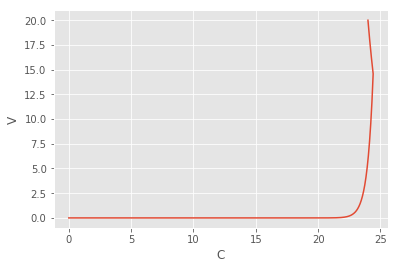

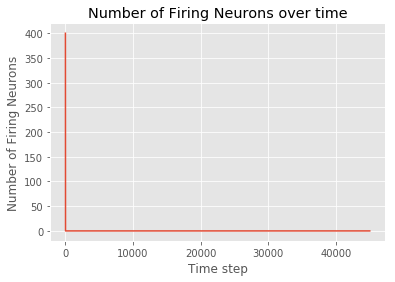

In [16]:
N=45000 #15000
n=200
dt=0.001
T=zeros(N)
for i in range(N):
    T[i]=i*dt
p = .9 #Probability of Connection 
M=getRandomConnectivity(n,p)
l=matrixOfEdges(M,n)
M_prime = copy.deepcopy(M)
l_prime = copy.deepcopy(l)
to_cull = 0
tauv=0.01 
tauc=0.5
Vstar=15
Cstar=20 
V0=20
C0=24

delV=10 #1.2
delC=0.015
r=70
r_0=0 #5

g_v = .1 #.95
g_c = .1 #.95

params=zeros(15)
params[0]=N
params[1]=n
params[2]=dt
params[3]=tauv
params[4]=tauc
params[5]=Vstar
params[6]=Cstar
params[7]=delV
params[8]=delC
params[9]=r
params[10]=V0
params[11]=C0
params[12]=g_v
params[13]=g_c
params[14]=r_0


C,V,firing_neurons_count= simdyn(M, l, params)
print(classify(V,params))
#figure(1)
#plot(T,C,'r',T,V,'b')
figure(2)
ylabel('V')
xlabel('C')
plot(C,V)
show
print(np.count_nonzero(firing_neurons_count))
print(firing_neurons_count.size)
print(shape(firing_neurons_count))
neuron_counts_sums = []
for i in range(N):
    neuron_counts_sums.append(sum(firing_neurons_count[i,:]))
figure(3)
plot(neuron_counts_sums)
title("Number of Firing Neurons over time")
xlabel("Time step")
ylabel("Number of Firing Neurons")
show

#savefig(f'firing_neurons_animation.png')

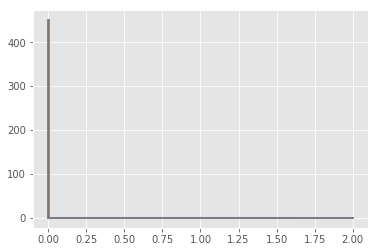

In [14]:
plot(firing_neurons_count,T)

### TODO: Phase Diagram in g_c and del_V

Fix g_c = g_v
Generate phase diagrams in terms of g_v and delV 
Decrease g_c, increase delV, try to get stable oscillations in step function limit (g_c -> 0)

### TODO: Phase diagram for sigmoid in delC, not just delV 

### TODO: Implement RK4 ODE solver to check for stability as t $\rightarrow \text{Large}$

In [20]:
@jit(nopython=True)
def kernel(n,l,P,sump):
    for j in range(n):
        a=int(l[j,0])
        for k in range(a):
            b=int(l[j,k])
            sump[j]=sump[j]+P[b]  #if neuron connected to j-th neuron it participates in sum

class ODETwoCompartment:
    def __init__(self, l, params):
        self.N=int(params[0])
        self.n=int(params[1])
        self.dt=params[2]
        self.tauv=params[3]
        self.tauc=params[4]
        self.Vstar=params[5]
        self.Cstar=params[6]
        self.delV=params[7]
        self.delC=params[8]
        self.r=params[9]
        self.V0=params[10]
        self.C0=params[11]
        self.g_v=params[12]
        self.g_c=params[13]
        self.r_0=params[14]
        self.l=l
        

    def derivative(self,V,C):
        P=zeros(self.n)
        sump=zeros(self.n)
        derV=zeros(self.n)
        derC=zeros(self.n)
        
        P = self.r/(1+np.exp((self.Vstar-V)/self.g_v)) + self.r_0
        '''
        for j in range(self.n):
            P[j] = self.r/(1+exp((self.Vstar-V[j])/self.g_v)) + self.r_0 #Added r_0
            #print(P[j]) #Debug statement to see range of P[j]
            
        '''
        
        
        kernel(n,l,P,sump)
        '''
        for j in range(self.n):
            a=int(self.l[j,0])
            for k in range(a):
                b=int(self.l[j,k])
                sump[j]=sump[j]+P[b]  #if neuron connected to j-th neuron it participates in sum

            #derV[j] = (-V[j]/self.tauv + self.delV*sump[j]*(1/(1+exp((C[j]-self.Cstar)/self.g_c))) )*self.dt 
            #derC[j] = (-C[j]/self.tauc + self.delC*sump[j])*self.dt 
        '''
        derV = (-V/self.tauv + self.delV*sump*(1/(1+np.exp((C-self.Cstar)/self.g_c))) )*self.dt 
        derC = (-C/self.tauc + self.delC*sump)*self.dt 
            
        return (derV, derC)
    
#RK4 Implementation 
def simdynrk4(M,l,params):
    return simdynamicsrk4(M,l,params) 
    
#@jit(nopython=True)
def simdynamicsrk4(M,l,params): 
    N=int(params[0])
    n=int(params[1])
    dt=params[2]
    tauv=params[3]
    tauc=params[4]
    Vstar=params[5]
    Cstar=params[6]
    delV=params[7]
    delC=params[8]
    r=params[9]
    V0=params[10]
    C0=params[11]
    V=zeros(N*n).reshape(N,n)  #now we have potencial and calcium concentration for each neuron
    C=zeros(N*n).reshape(N,n)
    P=zeros(n)  # function P(V), sigmoid
    sump=zeros(n)  #sum of P over the vertices
    avV=zeros(N) #average potencial
    avC=zeros(N)  #average calcium
    g_v=params[12]
    g_c=params[13]
    r_0=params[14]
    
    ode = ODETwoCompartment(l,params)
    
    firing_neurons_count = zeros(N*n).reshape(N,n) #Keep dimensions of C and V
    
    for i in range(n):
        V[0,i]=V0 #initial conditions
        C[0,i]=C0 
        
        if V[0,i] < 10: 
            firing_neurons_count[0,i] = 1 #Firing count based on I.C's 
        elif V[0,i] < 25:
            firing_neurons_count[0,i] = 2
        elif V[0,i] < 40:
            firing_neurons_count[0,i] = 3
        elif V[0,i] >= 40:
            firing_neurons_count[0,i] = 4
            
        avV[0]=n*V0  #we will divide to n later
        avC[0]=n*C0
        
    for i in range (N-1):
        
        ''' Euler Method 
        V[i+1,j]=(-V[i,j]/tauv + delV*sump[j]*(1/(1+exp((C[i,j]-Cstar)/g_c))) )*dt + V[i,j]
        C[i+1,j]=(-C[i,j]/tauc + delC*sump[j])*dt + C[i,j]
        '''

        V0, C0 = V[i,:], C[i,:]
        v1,c1 = ode.derivative(V0,C0)
        v2,c2 = ode.derivative(V0+v1/2, C0+c1/2)
        v3,c3 = ode.derivative(V0+v2/2, C0+c2/2)
        v4,c4 = ode.derivative(V0+v3, C0+c3)

        V[i+1,:] = V0 + v1/6 + v2/3 + v3/3 + v4/6
        C[i+1,:] = C0 + c1/6 + c2/3 + c3/3 + c4/6
        
        avC[i+1]=np.sum(C[i+1,:])
        avV[i+1]=np.sum(V[i+1,:])
        
        
    avC /= n
    avV /= n
    '''
    for i in range (N):
        avC[i]=avC[i]/n
        avV[i]=avV[i]/n
    '''
        #plot([avC[i],avC[i+1]],[avV[i],avV[i+1]])    
    return(avC,avV) #Now also return count of firing neurons 
            
            

In [21]:
N=100000 #15000
n=200
dt=0.0001
T=zeros(N)
for i in range(N):
    T[i]=i*dt
p = .9 #Probability of Connection 
M=getRandomConnectivity(n,p)
l=matrixOfEdges(M,n)
M_prime = copy.deepcopy(M)
l_prime = copy.deepcopy(l)
to_cull = 0
tauv=0.01 
tauc=0.5
Vstar=15
Cstar=20 
V0=20
C0=24

delV=10 #1.2
delC=0.015
r=70
r_0=5

g_v = .95 #.95
g_c = .95 #.95

params=zeros(15)
params[0]=N
params[1]=n
params[2]=dt
params[3]=tauv
params[4]=tauc
params[5]=Vstar
params[6]=Cstar
params[7]=delV
params[8]=delC
params[9]=r
params[10]=V0
params[11]=C0
params[12]=g_v
params[13]=g_c
params[14]=r_0

for i in range(10):
    M=getRandomConnectivity(n,p)
    l=matrixOfEdges(M,n)
    C,V = simdynrk4(M, l, params)
    Ceuler,Veuler = simdyn(M,l,params)
    print(classify(V,params))
    #figure(1)
    #plot(T,C,'r',T,V,'b')
    figure(1)
    ylabel('V')
    xlabel('C')
    plot(C,V,label="Runge Kutta")
    plot(Ceuler,Veuler,label="Euler")
    legend()
    #savefig("rk4_vs_euler/rk4_vs_euler_%d.png"%i)
    clf()

1


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [22]:
p = .9 #Probability of Connection 
M=getRandomConnectivity(n,p)
l=matrixOfEdges(M,n)

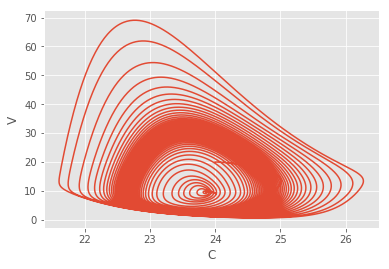

In [23]:
N=100000 #15000
n=200
dt=0.0001
T=zeros(N)
for i in range(N):
    T[i]=i*dt
    
tauv=0.01 
tauc=0.5
Vstar=15
Cstar=20 
V0=20
C0=24

delV=10 #1.2
delC=0.015
r=70
r_0=5

g_v = .95 #.95
g_c = .95 #.95

params=zeros(15)
params[0]=N
params[1]=n
params[2]=dt
params[3]=tauv
params[4]=tauc
params[5]=Vstar
params[6]=Cstar
params[7]=delV
params[8]=delC
params[9]=r
params[10]=V0
params[11]=C0
params[12]=g_v
params[13]=g_c
params[14]=r_0

C1,V1 = simdynrk4(M, l, params)

figure(1)
ylabel('V')
xlabel('C')
plot(C1,V1,label="Runge Kutta")

<function matplotlib.pyplot.show(*args, **kw)>

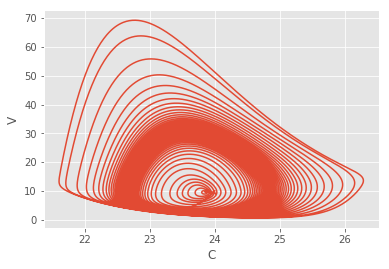

In [26]:
N=100000 #15000
n=200
dt=0.0001
T=zeros(N)
for i in range(N):
    T[i]=i*dt
    
tauv=0.01 
tauc=0.5
Vstar=15
Cstar=20 
V0=10 #20
C0=24 #24

delV=10 #1.2
delC=0.015
r=70
r_0=5

g_v = .95 #.95
g_c = .95 #.95

params=zeros(15)
params[0]=N
params[1]=n
params[2]=dt
params[3]=tauv
params[4]=tauc
params[5]=Vstar
params[6]=Cstar
params[7]=delV
params[8]=delC
params[9]=r
params[10]=V0
params[11]=C0
params[12]=g_v
params[13]=g_c
params[14]=r_0

C2,V2 = simdynrk4(M, l, params)
figure(1)
ylabel('V')
xlabel('C')
plot(C2,V2,label="Runge Kutta")
show

In [220]:
plot(C1,V1,label="Step Size: 100000, dt: 0.0001")
plot(C2,V2,label="Step Size: 1000, dt: 0.01")
ylabel('V')
xlabel('C')
legend()
savefig("step_comparison.png")

### Phase Diagram for Sigmoid 

In [49]:
phasen, phaseV, kCore = [],[],[] #for plotting general, uninformative phase diagram
#phasen_SO_Q, phasen_Q_HA, phasen_SO_HA, phase_SO_Q, phase_Q_HA, phase_SO_HA = [],[],[],[],[],[]
dV = 0.1
delVmax = 10.
to_cull = 0

while True:
    C,V,f = simdyn(M_prime,l_prime,params)
    check = classify(V,params)
    while True:
        params[1] -= 1
        to_cull += 1
        M_prime = killNeuron2(to_cull, M)
        l_prime = matrixOfEdges(M_prime, params[1])
        if params[1] <= 1:
            params[7] += dV
            params[1] = n
            to_cull = 0
            M_prime = copy.deepcopy(M)
            l_prime = copy.deepcopy(l)
            break
        C,V,f = simdyn(M_prime,l_prime,params)
        check2 = classify(V,params)
        if check2 != check:
            print("delV: ", params[7])
            print("transition from", check, "to", check2)
            #print("Kcore: ", largestKcore(M_prime), "Predicted:",Vstar/(tauv*70*params[12]))
            phasen.append(params[1])
            phaseV.append(params[7])
            kCore.append(largestKcore(M_prime))
            params[7] += dV
            if params[1] < n-3:
                to_cull -= 3
                params[1] += 3 #Changed from params[1] = n to track boundary 
                M_prime = killNeuron2(to_cull, M)
                l_prime = matrixOfEdges(M_prime, params[1])
            else:
                to_cull = 0
                params[1] = n 
                M_prime = copy.deepcopy(M)
                l_prime = copy.deepcopy(l)
                
            break

    if params[7] > delVmax:
        break
print('loop complete')

delV:  0.7999999999999999
transition from 1 to 2
delV:  0.8999999999999999
transition from 1 to 2
delV:  0.9999999999999999
transition from 1 to 2
delV:  1.0999999999999999
transition from 1 to 2
delV:  1.2
transition from 1 to 2
delV:  1.3
transition from 1 to 2
delV:  1.4000000000000001
transition from 1 to 2
delV:  1.5000000000000002
transition from 1 to 2
delV:  1.6000000000000003
transition from 1 to 2
delV:  1.7000000000000004
transition from 1 to 2
delV:  1.8000000000000005
transition from 1 to 2
delV:  1.9000000000000006
transition from 1 to 2
delV:  2.0000000000000004
transition from 1 to 2
delV:  2.1000000000000005
transition from 1 to 2
delV:  2.2000000000000006
transition from 1 to 2
delV:  2.3000000000000007
transition from 1 to 2
delV:  2.400000000000001
transition from 1 to 2
delV:  2.500000000000001
transition from 1 to 2
delV:  2.600000000000001
transition from 1 to 3
delV:  2.700000000000001
transition from 1 to 3
delV:  2.800000000000001
transition from 1 to 3
delV: 

In [50]:
plot(phaseV, phasen)

### Network Connectivity, randomly connected, Sigmoid function firing rate 

In [165]:
idx = 8500 #N-1, 9800
G = nx.DiGraph()
H = nx.DiGraph()
G.add_nodes_from(range(0,n))
H.add_nodes_from(range(0,n))
for i in range(n):
    for j in range(n):
        if M[i,j] == 1: #and neuron_counts[N-1,j] == 1:
            #if neuron_counts[N-1,j] == 1:
            if firing_neurons_count[idx,i] == 1:
                H.add_edge(i,j,firing=True,weight=1)
            elif firing_neurons_count[idx,i] == 2: 
                H.add_edge(i,j,firing=True,weight=2)
            elif firing_neurons_count[idx,i] == 3:
                H.add_edge(i,j,firing=True,weight=3)
            elif firing_neurons_count[idx,i] == 4:
                H.add_edge(i,j,firing=True,weight=4)
            
            
            #else:
            #    G.add_edge(i,j,firing=False)
            
e1 = [(u,v) for (u,v,d) in H.edges(data=True) if d['weight'] == 1]
e2 = [(u,v) for (u,v,d) in H.edges(data=True) if d['weight'] == 2]
e3 = [(u,v) for (u,v,d) in H.edges(data=True) if d['weight'] == 3]
e4 = [(u,v) for (u,v,d) in H.edges(data=True) if d['weight'] == 4]

In [166]:
import matplotlib.patches as mpatches
figure(4)
plt.title("%d Neurons in network, step %d, V* = %f"%(G.order(),idx,Vstar))
#nx.draw_circular(H,node_size=20,width=0.3,node_color='black', edge_color='red',with_labels=True,edgelist = e1,style='dashed')
#nx.draw_circular(H,node_size=20,wideh=0.3,node_color='black',edge_color='blue',with_labels=True,edgelist=e2)
#nx.draw_circular(H,node_size=20,wideh=0.3,node_color='black',edge_color='green',with_labels=True,edgelist=e3)
#nx.draw_circular(H,node_size=20,wideh=0.3,node_color='black',edge_color='yellow',with_labels=True,edgelist=e4)

pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,node_size=15,node_color='black',labels=True)
nx.draw_networkx_edges(H,pos,edgelist=e1,width=0.2,edge_color='blue')     #Blue
nx.draw_networkx_edges(H,pos,edgelist=e2,width=0.2,edge_color='green')    #Green
nx.draw_networkx_edges(H,pos,edgelist=e3,width=0.2,edge_color='orange')   #Yellow
nx.draw_networkx_edges(H,pos,edgelist=e4,width=0.2,edge_color='red')      #Red
nx.draw_networkx_labels(H,pos)
axis('off')

red_patch=mpatches.Patch(color='blue', label='V < %f'%(Vstar/2))
blue_patch=mpatches.Patch(color='green', label='%f< V < %f'%(Vstar/2, Vstar))
green_patch=mpatches.Patch(color='orange', label='%f < V < %f'%(Vstar,2*Vstar))
yellow_patch=mpatches.Patch(color='red', label='V >= %f'%(2*Vstar))
legend(handles=[red_patch,blue_patch,green_patch,yellow_patch])

#nx.draw_circular(G,node_size=20,width=0.3,edge_color='black',node_color='black')
#plt.savefig('neuron_connectivity.png')
#plt.savefig('figures/Animation/neuron_connectivity_at_step_%d'%idx)

In [167]:
print(H.degree(52))
for i in range(60): 
    print('Node: #%d, Connectivity:%d'%(i,H.degree(i)))

97
Node: #0, Connectivity:84
Node: #1, Connectivity:90
Node: #2, Connectivity:100
Node: #3, Connectivity:87
Node: #4, Connectivity:90
Node: #5, Connectivity:82
Node: #6, Connectivity:93
Node: #7, Connectivity:86
Node: #8, Connectivity:89
Node: #9, Connectivity:93
Node: #10, Connectivity:83
Node: #11, Connectivity:91
Node: #12, Connectivity:86
Node: #13, Connectivity:80
Node: #14, Connectivity:83
Node: #15, Connectivity:89
Node: #16, Connectivity:92
Node: #17, Connectivity:88
Node: #18, Connectivity:90
Node: #19, Connectivity:90
Node: #20, Connectivity:95
Node: #21, Connectivity:82
Node: #22, Connectivity:89
Node: #23, Connectivity:82
Node: #24, Connectivity:93
Node: #25, Connectivity:88
Node: #26, Connectivity:92
Node: #27, Connectivity:94
Node: #28, Connectivity:85
Node: #29, Connectivity:86
Node: #30, Connectivity:99
Node: #31, Connectivity:88
Node: #32, Connectivity:93
Node: #33, Connectivity:78
Node: #34, Connectivity:86
Node: #35, Connectivity:90
Node: #36, Connectivity:86
Node: #

### Pretty Pictures of firing rate and calcium concentration functions for Paper

In [65]:
g_v=5
off_set=0
x = []
rg=linspace(-30,30,1000)
for i in rg:
    x.append(1/(1+exp(-(i+10)/g_v)) + off_set) 

ylim(0,1)
plot(x)

In [79]:
#Step Function Firing Rate plot
r_0 = 5
r_1 = 70
g_v=1
rg=linspace(-70,-30,1000)
Vthresh=-55
x=[]
xsig=[]
for i in rg:
    if i < Vthresh:
        x.append(r_0)    
    else:
        x.append(r_0+r_1)
    xsig.append((r_1)/(1+exp(-(i+55)/g_v)) + r_0)
        
ylabel("P (Hz)", fontsize=30)
xlabel("Voltage (mV)", fontsize=30)
plot(rg,x,label="Step Function", lw=4)
plot(rg,xsig,label="Sigmoid Function, $g_V = 5$", lw=4)
legend(prop={'size':24})
plt.tick_params(axis='both', labelsize=30)
#savefig("paper_figures/firing_rate_step.png", bbox_inches="tight")

In [80]:
#Step Function Calcium Concentration plot 
g_c=.1
rg=linspace(0,3,1000)
delVthresh=1.
y=[]
ysig=[]
for i in rg:
    if i < delVthresh:
        y.append(delVthresh)
    else:
        y.append(0)
    ysig.append(-(delVthresh)/(1+exp(-(i-1)/g_c)) + delVthresh)
        
ylabel("$\Delta$V (mV)", fontsize=30)
xlabel("Ca (arb. units)", fontsize=30)
plot(rg,y,label="Step Function", lw=4)
plot(rg,ysig,label="Sigmoid Function, $g_C=0.1$", lw=4)
legend(prop={'size':24})
plt.tick_params(axis='both', labelsize=30)
#savefig("paper_figures/calcium_concentration_step.png", bbox_inches="tight")

### Autocorrelation Functions to determine chaos regime 